In [19]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 19 14:41:04 2022

@author: Amin
"""
import jax.numpy as jnp

import sys
sys.path.insert(1,'..')
import utils
import loader
import setup
%load_ext autoreload
%autoreload 2

import imp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:


dataloader = loader.IBLDataLoader(
    setup.params,eids=setup.good_eids
)

xs,ys,rs,cs = dataloader.load_train_data()

local md5 mismatch on dataset: cortexlab/Subjects/KS074/2021-11-22/001/alf/probe00/pykilosort/channels.brainLocationIds_ccf_2017.npy
local md5 mismatch on dataset: cortexlab/Subjects/KS074/2021-11-22/001/alf/probe00/pykilosort/channels.mlapdv.npy
../data/2022_Q2_IBL_et_al_RepeatedSite/cortexlab/Subjects/KS074/2021-11-22/001/alf/probe00/pykilosort/channels.brainLocationIds_ccf_2017.npy: 100%|██████████| 3.20k/3.20k [00:00<00:00, 61.0kB/s]
../data/2022_Q2_IBL_et_al_RepeatedSite/cortexlab/Subjects/KS074/2021-11-22/001/alf/probe00/pykilosort/channels.mlapdv.npy: 100%|██████████| 4.74k/4.74k [00:00<00:00, 90.2kB/s]
local md5 mismatch on dataset: cortexlab/Subjects/KS074/2021-11-22/001/alf/probe00/pykilosort/channels.brainLocationIds_ccf_2017.npy
local md5 mismatch on dataset: cortexlab/Subjects/KS074/2021-11-22/001/alf/probe00/pykilosort/channels.mlapdv.npy
../data/2022_Q2_IBL_et_al_RepeatedSite/cortexlab/Subjects/KS074/2021-11-22/001/alf/probe00/pykilosort/channels.brainLocationIds_ccf_201

In [14]:

min_neurons = 100
min_trials = 25

valid = [i for i in range(len(ys)) if ys[i].shape[2] >= min_neurons and ys[i].shape[0] >= min_trials]
ys = [ys[i] for i in valid]

n_trials = min([y.shape[0] for y in ys])
n_neuorns = min([y.shape[2] for y in ys])

# Selection based on variance across trials
ys = jnp.stack([y[:min_trials,:,jnp.argsort(y.mean(0).std(0))[:100]] for y in ys])



In [12]:
print('Subjects: {}, Trials:{}, Conditions:{}, Neurons:{}'.format(*ys.shape))

S,K,C,N = ys.shape


Subjects: 19, Trials:25, Conditions:90, Neurons:100


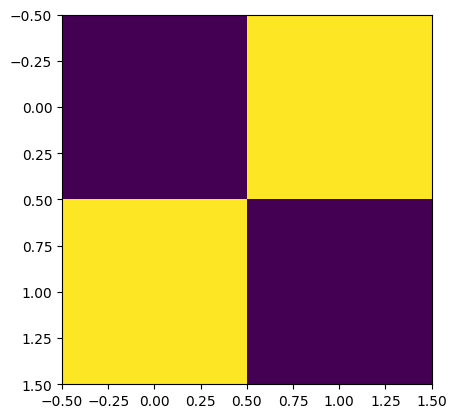

In [45]:

dist_neural = utils.dsd([
    [ys[i].mean(0),ys[j].mean(0)]
     for i in range(len(ys)) 
     for j in range(len(ys))]
).reshape(S,S)
dist_neural

import matplotlib.pyplot as plt
plt.imshow(dist_neural)


In [ ]:

# dist_rt = utils.ssd([
#     [[rts[i].mean(0)[:,None], rts[i].var(0)[:,None,None]],
#      [rts[j].mean(0)[:,None], rts[j].var(0)[:,None,None]]]
#     for i in range(len(ys)) 
#     for j in range(len(ys))],
#     alpha=2.,
#     niter=1000
# )

# dist_cc = utils.ssd([
#     [[ccs[i].mean(0)[:,None], ccs[i].var(0)[:,None,None]],
#      [ccs[j].mean(0)[:,None], ccs[j].var(0)[:,None,None]]]
#     for i in range(len(ys)) 
#     for j in range(len(ys))],
#     alpha=2.,
#     niter=1000
# )